In [16]:
#!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile

zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In [4]:
df = pd.read_csv('../project_data/Data/train_data.csv')

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_2996/2564130253.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../project_data/Data/train_data.csv')


## Basic Statistics ##

In [5]:
# Check for missing values
# Summary statistics
# Categorical distribution
df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display the first few rows and summary info to get an overview of the data
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

(None,
   Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
 0    2019-12-30           31.0                              N    2020-01-01   
 1    2019-08-30           46.0                              N    2020-01-01   
 2    2019-12-06           40.0                              N    2020-01-01   
 3           NaN            NaN                            NaN    2020-01-01   
 4    2019-12-30           61.0                              N    2020-01-01   
 
   Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
 0                       N                 0.00      1988.0  2019-12-31   
 1                       Y              1745.93      1973.0  2020-01-01   
 2                       N              1434.80      1979.0  2020-01-01   
 3                     NaN                  NaN         NaN         NaN   
 4                       N                  NaN      1958.0  2019-12-31   
 
      C-3 Date                  Carrier Name  ... WCIO Caus

In [7]:
# Checking for missing values across columns
missing_values = df.isnull().sum()
missing_values

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [8]:
# Generating basic summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [9]:
# Checking categorical column distributions
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_distribution = df[categorical_columns].apply(lambda col: col.value_counts().head(10))  # top 10 values for each
categorical_distribution

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
1. CANCELLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12477.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2971.0,NaN
11207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2633.0,NaN
11208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2559.0,NaN
11212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2504.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1774.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WESTCHESTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25754.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHOLESALE TRADE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15236.0,NaN,NaN,NaN,NaN,NaN,NaN
X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Possible Inconsistencies ##

In [10]:
# Step 1: Checking for outliers and invalid entries

# 1.1 Age at Injury: Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_outliers = df[(df['Age at Injury'] == 0) | (df['Age at Injury'] > 100)]
age_outliers


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
262,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,...,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
358,2019-12-28,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,TWIN CITY FIRE INS CO.,...,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5.0
370,NaN,0.0,N,2020-01-02,Y,0.0,1959.0,NaN,2019-12-23,STARR INDEMNITY & LIABILITY CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0
396,NaN,0.0,N,2020-01-02,Y,0.0,1984.0,NaN,2019-12-27,LM INSURANCE CORP,...,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0
433,2019-12-20,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,CARMEL CENTRAL SCHOOL DISTRICT,...,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,35.0,HAND,10512,0.0,Not Work Related,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592964,NaN,0.0,N,2022-12-30,Y,0.0,0.0,2023-01-10,2022-12-28,NYC TRANSIT AUTHORITY,...,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,-9.0,MULTIPLE,22473,0.0,Not Work Related,3.0
592978,NaN,0.0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,...,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6.0
593063,NaN,0.0,N,2022-12-30,Y,0.0,1957.0,NaN,2022-12-27,"CNY OTHER THAN ED, HED WATER",...,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0.0
593087,2022-12-13,0.0,N,2022-12-30,N,0.0,1903.0,2022-12-30,NaN,SECURITY NATIONAL INSURANCE CO,...,17.0,OBJECT BEING LIFTED OR HANDLED,43.0,PUNCTURE,36.0,FINGER(S),12309,0.0,Not Work Related,1.0


In [11]:
# 1.2 Average Weekly Wage: Check for negative or extremely high wages
wage_outliers = df[df['Average Weekly Wage'] < 0]
wage_outliers

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents


In [12]:
# 1.3 Birth Year: Ensure Birth Year is realistic (e.g., not before 1900 or too far in the future)
birth_year_outliers = df[(df['Birth Year'] < 1900) | (df['Birth Year'] > 2024)]
birth_year_outliers


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
11,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
47,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,...,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
56,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
77,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,...,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
83,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,...,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593291,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,...,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
593361,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
593394,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0
593427,2022-12-28,70.0,N,2022-12-30,Y,NaN,0.0,2022-12-30,2023-09-15,NYC HOUSING AUTHORITY,...,66.0,OBJECT BEING LIFTED OR HANDLED,10.0,CONTUSION,32.0,ELBOW,32164,0.0,Not Work Related,1.0


In [13]:
# 1.4 Logical check: Age at Injury vs. Birth Year (calculate age and compare to given Age at Injury)
# We'll use the 'Accident Date' to check the consistency if possible
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
age_discrepancies.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Accident Year
11,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0,2019.0
13,2019-08-26,62.0,N,2020-01-01,N,0.0,1956.0,2020-01-01,NaN,AMERICAN ZURICH INSURANCE CO,...,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),10703,0.0,Not Work Related,4.0,2019.0
21,2019-09-15,30.0,N,2020-01-01,Y,0.0,1988.0,2020-01-01,2020-01-03,PROPERTY AND CASUALTY,...,"MOTOR VEHICLE, NOC",28.0,FRACTURE,52.0,UPPER LEG,11211,0.0,Not Work Related,1.0,2019.0
47,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,...,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0,2019.0
56,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,...,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0,2019.0


## Visualization ##

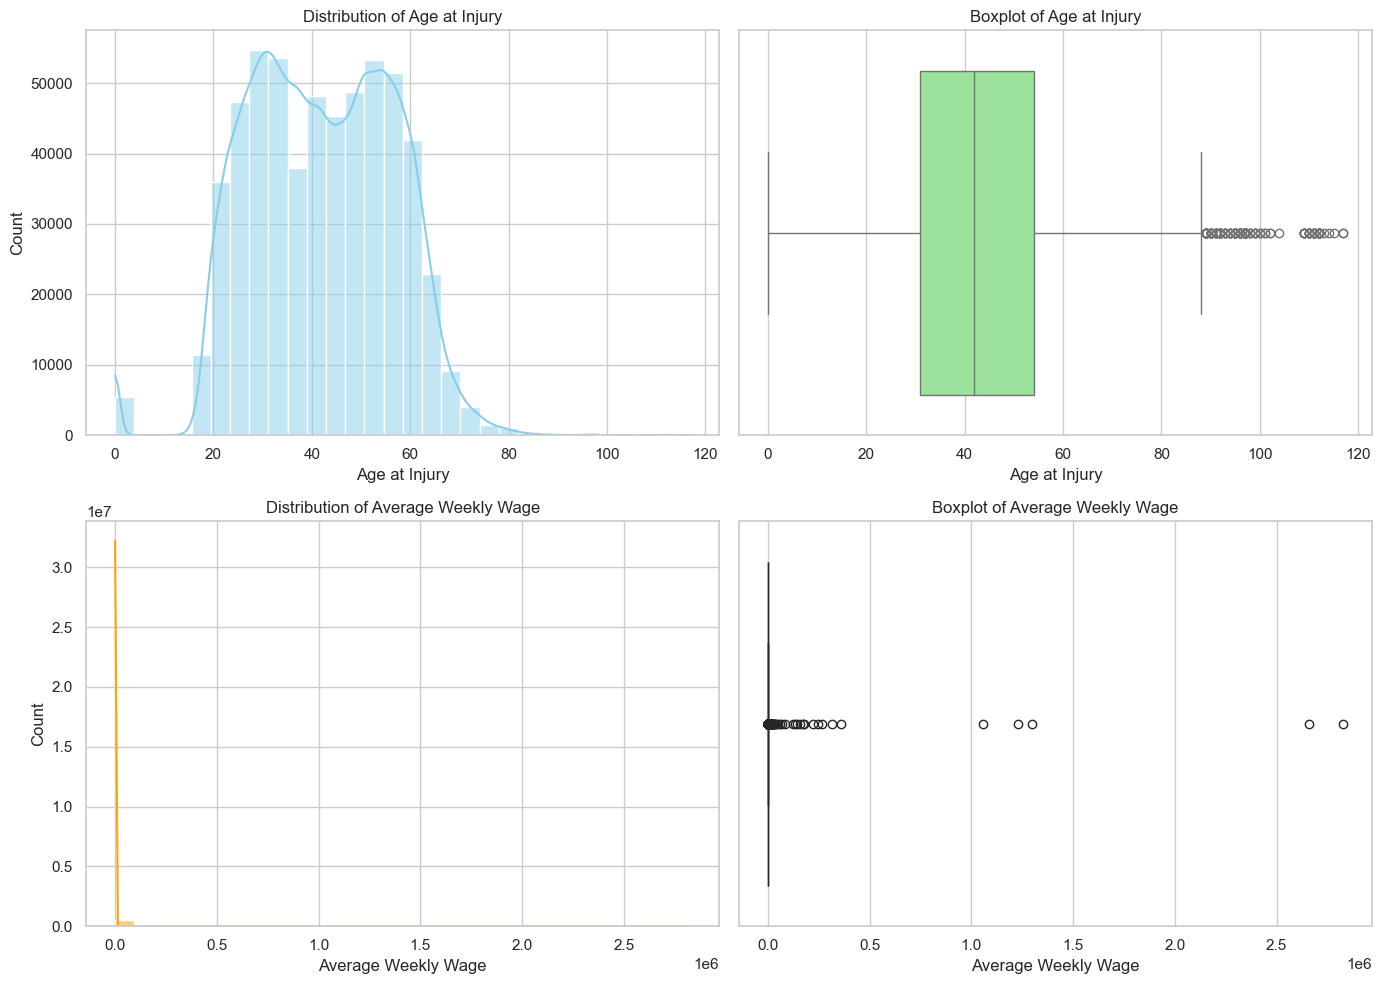

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualization
sns.set(style="whitegrid")

# Step 1: Continuous Features - Visualize Age at Injury and Average Weekly Wage
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1.1 Histogram for Age at Injury
sns.histplot(df['Age at Injury'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age at Injury')

# 1.2 Boxplot for Age at Injury
sns.boxplot(x=df['Age at Injury'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot of Age at Injury')

# 1.3 Histogram for Average Weekly Wage (focusing on reasonable values, avoiding extreme outliers)
sns.histplot(df['Average Weekly Wage'].dropna(), bins=30, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribution of Average Weekly Wage')

# 1.4 Boxplot for Average Weekly Wage
sns.boxplot(x=df['Average Weekly Wage'].dropna(), ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Boxplot of Average Weekly Wage')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [17]:
""" # Lista de inconsistências
1. Numerical Inconsistencies:
Age at Injury:
Age of 0 or very high values (e.g., greater than 100) are unrealistic.
Age discrepancies where the calculated age (based on birth year and accident date) doesn’t match the reported age.
Average Weekly Wage:
Wages less than zero would be invalid.
Extremely high values might need investigation if they exceed reasonable limits for the industry or region.
IME-4 Count:
Negative or abnormally high counts (should be a non-negative integer).
2. Date Inconsistencies:
Accident Date, Assembly Date, C-2 Date, C-3 Date, and First Hearing Date:
Missing or future dates (e.g., accident dates occurring after the assembly date or dates beyond the current year).
First hearing date should not be before the assembly or accident date.
C-3 Date should be on or after the accident date.
Birth Year:
Extremely old or future birth years (e.g., before 1900 or after 2024) are suspicious.
3. Logical Inconsistencies:
Age vs. Birth Year:
Ensure that "Age at Injury" aligns with the "Birth Year" and "Accident Date." For example, if an accident occurred in 2020 and the birth year is 1990, the age should be around 30.
COVID-19 Indicator:
Must be consistent with the accident date. For example, accidents occurring in 2018 cannot have a "Y" for COVID-19.
4. Categorical Data Inconsistencies:
Gender:
Missing or invalid entries (e.g., non-standard gender labels).
Carrier Type:
Inconsistent or miscategorized types.
WCIO Cause/Nature/Part of Injury Codes:
Ensure that the codes match their descriptions, and there are no mismatches or missing codes that should have valid descriptions.
5. Text Data Inconsistencies:
Carrier Name, District Name, County of Injury, etc.:
Misspelled or inconsistent names (e.g., different spellings or abbreviations for the same carrier).
Missing entries where there should be data (especially for mandatory fields like county or carrier name).
6. Redundancy and Duplicates:
Claim Identifier:
Duplicate claim IDs suggest that a record might be duplicated, which could lead to inaccurate analysis.
7. Missing Values:
First Hearing Date:
It might be missing if a hearing has not yet occurred, but we need to ensure these cases are legitimate.
Attorney/Representative:
If missing, it could indicate an unrepresented claim, but large-scale missing data could suggest incomplete records.
8. Agreement Reached:
Ensure consistency between this binary field and WCB Decision. If an agreement is reached without WCB, the decision should reflect that. """

' # Lista de inconsistências\n1. Numerical Inconsistencies:\nAge at Injury:\nAge of 0 or very high values (e.g., greater than 100) are unrealistic.\nAge discrepancies where the calculated age (based on birth year and accident date) doesn’t match the reported age.\nAverage Weekly Wage:\nWages less than zero would be invalid.\nExtremely high values might need investigation if they exceed reasonable limits for the industry or region.\nIME-4 Count:\nNegative or abnormally high counts (should be a non-negative integer).\n2. Date Inconsistencies:\nAccident Date, Assembly Date, C-2 Date, C-3 Date, and First Hearing Date:\nMissing or future dates (e.g., accident dates occurring after the assembly date or dates beyond the current year).\nFirst hearing date should not be before the assembly or accident date.\nC-3 Date should be on or after the accident date.\nBirth Year:\nExtremely old or future birth years (e.g., before 1900 or after 2024) are suspicious.\n3. Logical Inconsistencies:\nAge vs. B

OUTLIERS (Testes random)

In [20]:
def detect_outliers(df):
    outliers_indices = set()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outliers_indices.update(outlier_data.index)

        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100}% \n') 

    return outliers_indices          
        

In [21]:
iqr = detect_outliers(df)
iqr

Column: Age at Injury - Number of Outliers: 197
Column: Age at Injury - % of Outliers: 0.033194545310554345% 

Column: Average Weekly Wage - Number of Outliers: 22257
Column: Average Weekly Wage - % of Outliers: 3.75030961917263% 

Column: Birth Year - Number of Outliers: 25330
Column: Birth Year - % of Outliers: 4.268110825971277% 

Column: Claim Identifier - Number of Outliers: 19445
Column: Claim Identifier - % of Outliers: 3.276486972404717% 

Column: IME-4 Count - Number of Outliers: 7169
Column: IME-4 Count - % of Outliers: 1.2079781488901733% 

Column: Industry Code - Number of Outliers: 0
Column: Industry Code - % of Outliers: 0.0% 

Column: OIICS Nature of Injury Description - Number of Outliers: 0
Column: OIICS Nature of Injury Description - % of Outliers: 0.0% 

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.0% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - % of

{1,
 524290,
 3,
 524295,
 524298,
 11,
 524301,
 524302,
 524306,
 524307,
 524308,
 524309,
 20,
 27,
 33,
 524321,
 37,
 524326,
 38,
 524328,
 42,
 524333,
 524335,
 47,
 524339,
 51,
 524343,
 56,
 524344,
 58,
 59,
 524346,
 63,
 524352,
 64,
 65,
 66,
 70,
 71,
 524360,
 524359,
 524362,
 524363,
 75,
 77,
 524365,
 73,
 524368,
 83,
 524372,
 84,
 87,
 524378,
 524379,
 524380,
 93,
 94,
 95,
 524381,
 97,
 524383,
 524387,
 100,
 101,
 102,
 524386,
 524390,
 524392,
 98,
 109,
 524397,
 524398,
 524399,
 114,
 115,
 524403,
 117,
 524405,
 119,
 121,
 524411,
 524412,
 124,
 128,
 524416,
 524418,
 134,
 524422,
 524423,
 138,
 140,
 524434,
 151,
 152,
 524442,
 524443,
 524445,
 524446,
 159,
 161,
 164,
 165,
 166,
 172,
 176,
 524465,
 524466,
 180,
 183,
 185,
 186,
 524475,
 188,
 189,
 524478,
 524479,
 524476,
 524474,
 524477,
 195,
 524483,
 524481,
 524484,
 199,
 524488,
 524489,
 524490,
 524491,
 204,
 524493,
 524494,
 524495,
 206,
 209,
 524496,
 211,
 524497